# `Facebook Data Crawling`
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [134]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\AD\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
raw_df = pd.read_csv('Data/lopnguoita.fp.csv')
pro_df = pd.read_csv('Data/lopnguoita.fp.csv')

## `Processing Data`


1. Lo·∫°i b·ªè d·ªØ li·ªáu tr√πng l·∫∑p


In [137]:
pro_df.drop_duplicates(inplace= True)

2. Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu th√†nh `lower case` ƒë·ªëi v·ªõi `text` v√† `post_text`


In [138]:
pro_df['text'] = pro_df['text'].str.lower()
pro_df['post_text'] = pro_df['post_text'].str.lower()

pro_df[['text', 'post_text']]

text  \
0                            t√™n ·ªü nh√† c·ªßa b·∫°n l√† g√¨?   
1            m√™ c√°i c√°ch l·ªõp t·∫∑ng qu√† 20/11 cho c√¥ :3   
2                              m·∫•y ƒë·ª©a nh√°t g√°i ki·ªÉu:   
3   t·ªët nghi·ªáp ƒë·∫°i h·ªçc lu·∫≠t nh∆∞ng th∆° nguy·ªÖn v·∫´n q...   
4   ‚Äúb√°c sƒ© m·ªü ph√≤ng kh√°m t∆∞ th√¨ gi√°o vi√™n d·∫°y th√™...   
..                                                ...   
95                                     th·ªùi t·ªõiiiiiii   
96                          b√†i t·∫≠p c·ªßa chuy√™n anh :3   
97  tr∆∞·ªùng h·ªçc c√≥ nh√† v·ªá sinh h·ªçc sinh tr·ªã gi√° 600...   
98                                  h·ªçc ki·ªÉu g√¨ v·∫≠y??   
99                                   ƒë∆∞·ª£c gi√° th√¨ b√°n   

                                            post_text  
0                            t√™n ·ªü nh√† c·ªßa b·∫°n l√† g√¨?  
1            m√™ c√°i c√°ch l·ªõp t·∫∑ng qu√† 20/11 cho c√¥ :3  
2                              m·∫•y ƒë·ª©a nh√°t g√°i ki·ªÉu:  
3   t·ªët nghi·ªáp ƒë·∫°i h·ªçc lu·∫≠t nh∆∞ng th∆° nguy·ªÖn v·∫´n q...  
4   ‚Äúb√°c sƒ© m·ªü ph√≤ng kh√°m t∆∞ th√¨ gi√°o vi√™n d·∫°y th√™...  
..                                                ...  
95                                     th·ªùi t·ªõiiiiiii  
96                          b√†i t·∫≠p c·ªßa chuy√™n anh :3  
97  tr∆∞·ªùng h·ªçc c√≥ nh√† v·ªá sinh h·ªçc sinh tr·ªã gi√° 600...  
98                                  h·ªçc ki·ªÉu g√¨ v·∫≠y??  
99                                   ƒë∆∞·ª£c gi√° th√¨ b√°n  

[100 rows x 2 columns]

3. Chuy·ªÉn ƒë·ªïi `chu·ªói th·ªùi gian` th√†nh ki·ªÉu `datetime`.

In [139]:
pro_df['time'] = pd.to_datetime(pro_df['time'])
pro_df['day'] = pro_df['time'].dt.day

4. X·ª≠ l√Ω d·ªØ li·ªáu v·ªõi `reactions`

In [140]:
pro_df['reactions'] = pro_df['reactions'].apply(lambda x : dict(eval(x))) #Bi·∫øn m·ªói ph·∫ßn t·ª≠ trong reactions th√†nh m·ªôt t·ª´ ƒëi·ªÉn
list_reactions = pro_df['reactions'].apply(pd.Series) #Bi·∫øn t·ª´ng lo·∫°i reaction th√†nh c√°c c·ªôt Dataframe
list_reactions = list_reactions.fillna(0)
pro_df = pd.concat([pro_df, list_reactions], axis=1).drop('reactions', axis=1) # Gh√©p l·∫°i b·∫£ng d·ªØ ch√≠nh

## `Analysis Data`

1. ` ƒê√¢u l√† b√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c l·ªõn nh·∫•t?`

In [141]:
max_reactions_post = pro_df[pro_df['reaction_count']== pro_df['reaction_count'].max()]
max_reactions_post[['post_text', 'time', 'reaction_count']]

post_text                time  \
33  vƒÉn ngh·ªá ch√°y nh·∫•t 20.11 theo ƒë√∫ng nghƒ©a ƒëen 2023-11-16 12:45:34   

    reaction_count  
33           43754

2. `S·ªë l∆∞·ª£t t∆∞∆°ng t√°c trong c√°c b√†i ƒëƒÉng thay ƒë·ªïi nh∆∞ th·∫ø n√†o `

In [142]:
data_from_9_to_14 = pro_df[(pro_df['day'] >= 9) & (pro_df['day'] <= 14)]

In [143]:
data_from_15_to_20 = pro_df[(pro_df['day'] >= 15) & (pro_df['day'] <= 21)]

1.Plot t·ªïng quan

In [144]:
dates1 = data_from_9_to_14['time'].to_list()
reaction_list1 = data_from_9_to_14['reaction_count'].to_list()
dates1.reverse()
reaction_list1.reverse()

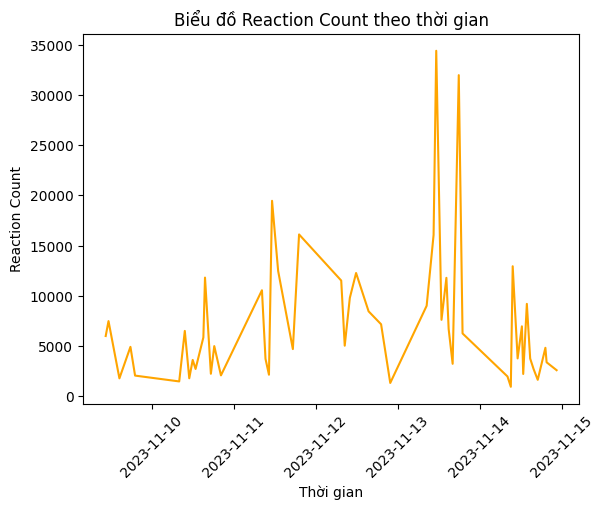

In [145]:

plt.plot(dates1, reaction_list1, color= 'orange')
plt.xticks(rotation=45)

plt.title('Bi·ªÉu ƒë·ªì Reaction Count theo th·ªùi gian')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Reaction Count')

plt.show()


In [146]:
dates2 = data_from_15_to_20['time'].to_list()
reaction_list2 = data_from_15_to_20['reaction_count'].to_list()
dates2.reverse()
reaction_list2.reverse()

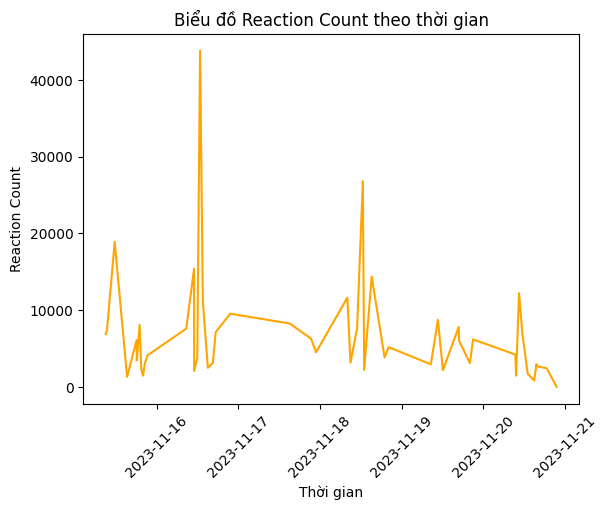

In [147]:
plt.plot(dates2, reaction_list2, color= 'orange')
plt.xticks(rotation=45)

plt.title('Bi·ªÉu ƒë·ªì Reaction Count theo th·ªùi gian')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Reaction Count')

plt.show()


2. Mean


In [148]:
data_from_9_to_14['reaction_count'].mean()

7329.823529411765

In [149]:
data_from_15_to_20['reaction_count'].mean()

6868.551020408163

In [150]:
len(data_from_9_to_14[data_from_9_to_14['reaction_count'] >= 10000])

12

In [151]:
len(data_from_15_to_20[data_from_15_to_20['reaction_count'] >= 10000])

8

In [152]:
data_from_15_to_20[data_from_15_to_20['y√™u th√≠ch'] >= 1000]

post_id                                               text  \
21  729096335925726                                      th·∫ßy c∆∞ng x·ªâu   
24  728997442602282                  gi√°o vi√™n toi mong ∆∞·ªõc ƒë∆∞·ª£c h·ªçc ü•π   
33  727851522716874       vƒÉn ngh·ªá ch√°y nh·∫•t 20.11 theo ƒë√∫ng nghƒ©a ƒëen   
44  727406946094665  ‚ú®nam sinh l·ªõp 9 ·ªü l√†o cai ƒë·∫°t ielts 8.5‚ú®\n\nmi...   

                                            post_text  shared_text  \
21                                      th·∫ßy c∆∞ng x·ªâu          NaN   
24                  gi√°o vi√™n toi mong ∆∞·ªõc ƒë∆∞·ª£c h·ªçc ü•π          NaN   
33       vƒÉn ngh·ªá ch√°y nh·∫•t 20.11 theo ƒë√∫ng nghƒ©a ƒëen          NaN   
44  ‚ú®nam sinh l·ªõp 9 ·ªü l√†o cai ƒë·∫°t ielts 8.5‚ú®\n\nmi...          NaN   

    original_text                time   timestamp  \
21            NaN 2023-11-18 12:37:01  1700285821   
24            NaN 2023-11-18 08:03:33  1700269413   
33            NaN 2023-11-16 12:45:34  1700113534   
44            NaN 2023-11-15 18:05:30  1700046330   

                                                image  \
21  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
24  https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...   
33                                                NaN   
44  https://m.facebook.com/photo/view_full_size/?f...   

                                     image_lowquality  \
21  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
24  https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...   
33  https://scontent.fhan5-1.fna.fbcdn.net/v/t15.5...   
44  https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...   

                                               images  ... was_live  \
21  ['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...  ...    False   
24  ['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...  ...    False   
33                                                 []  ...    False   
44  ['https://m.facebook.com/photo/view_full_size/...  ...    False   

                  fetched_time day    th√≠ch    haha  y√™u th√≠ch    wow  \
21  2023-11-20 21:49:41.266067  18  12841.0  8554.0     4994.0   22.0   
24  2023-11-20 21:50:31.269810  18   7628.0    91.0     3774.0    9.0   
33  2023-11-20 21:53:35.942706  16  27152.0  6580.0     9309.0  526.0   
44  2023-11-20 21:56:31.533606  15   4106.0    69.0     1057.0  707.0   

    th∆∞∆°ng th∆∞∆°ng   bu·ªìn ph·∫´n n·ªô  
21          336.0   37.0     3.0  
24          114.0   29.0     0.0  
33          139.0   48.0     0.0  
44           36.0  148.0     1.0  

[4 rows x 58 columns]

In [153]:
data_from_9_to_14[data_from_9_to_14['reaction_count'] >= 16000]

post_id                                               text  \
63  726319276203432                                       t√¥i l√†m ƒë∆∞·ª£c   
68  726169796218380                                  vi th·∫ßn ƒë·ªùi th·ª© 2   
69  726154222886604                                     th∆∞∆°ng qu√° :'(   
78  725164246318935  nhuÃõÃÉng hiÃÄnh p.h.aÃ£.t maÃÄ thuyÃÅ kieÃÇÃÄu s·ª≠ d·ª•n...   
81  724996263002400                                  b·∫•t ng·ªù ch∆∞a =)))   

                                            post_text  shared_text  \
63                                       t√¥i l√†m ƒë∆∞·ª£c          NaN   
68                                  vi th·∫ßn ƒë·ªùi th·ª© 2          NaN   
69                                     th∆∞∆°ng qu√° :'(          NaN   
78  nhuÃõÃÉng hiÃÄnh p.h.aÃ£.t maÃÄ thuyÃÅ kieÃÇÃÄu s·ª≠ d·ª•n...          NaN   
81                                  b·∫•t ng·ªù ch∆∞a =)))          NaN   

    original_text                time   timestamp  \
63            NaN 2023-11-13 17:48:20  1699872500   
68            NaN 2023-11-13 11:12:48  1699848768   
69            NaN 2023-11-13 10:26:21  1699845981   
78            NaN 2023-11-11 19:05:14  1699704314   
81            NaN 2023-11-11 11:11:05  1699675865   

                                                image  \
63                                                NaN   
68  https://scontent.fsgn5-3.fna.fbcdn.net/v/t39.3...   
69  https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...   
78  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
81  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   

                                     image_lowquality  \
63  https://scontent.fhan5-1.fna.fbcdn.net/v/t15.5...   
68  https://scontent.fsgn5-3.fna.fbcdn.net/v/t39.3...   
69  https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...   
78  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
81  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   

                                               images  ... was_live  \
63                                                 []  ...    False   
68  ['https://scontent.fsgn5-3.fna.fbcdn.net/v/t39...  ...    False   
69  ['https://scontent.fsgn5-9.fna.fbcdn.net/v/t39...  ...    False   
78  ['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...  ...    False   
81  ['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...  ...    False   

                  fetched_time day    th√≠ch     haha  y√™u th√≠ch     wow  \
63  2023-11-20 22:00:50.512976  13   9614.0  17125.0      233.0    65.0   
68  2023-11-20 22:02:40.673702  13  22682.0    972.0      791.0  3675.0   
69  2023-11-20 22:02:56.551874  13   8800.0     37.0       86.0    38.0   
78  2023-11-20 22:06:03.860833  11  10585.0   1317.0      166.0   183.0   
81  2023-11-20 22:07:28.655535  11   6376.0   5554.0       77.0    57.0   

    th∆∞∆°ng th∆∞∆°ng    bu·ªìn ph·∫´n n·ªô  
63           59.0  4875.0     7.0  
68           55.0  6229.0     1.0  
69           26.0  7068.0     7.0  
78           15.0  3840.0     6.0  
81           17.0  7336.0    44.0  

[5 rows x 58 columns]

In [154]:
data_from_15_to_20[data_from_15_to_20['reaction_count'] >= 10000]

post_id                                          text  \
7   730294602472566                        c·∫£m ƒë·ªông t√¨nh c√¥ tr√≤ üòµ   
19  729152762586750              khi tr·ªùi l·∫°nh m√† ƒë√≤i b·∫≠t qu·∫°t :3   
21  729096335925726                                 th·∫ßy c∆∞ng x·ªâu   
24  728997442602282             gi√°o vi√™n toi mong ∆∞·ªõc ƒë∆∞·ª£c h·ªçc ü•π   
32  727869312715095                                      oke lu√¥n   
33  727851522716874  vƒÉn ngh·ªá ch√°y nh·∫•t 20.11 theo ƒë√∫ng nghƒ©a ƒëen   
36  727814949387198          c√≥ thi·ªác s·ª± l√† chi·∫øc l∆∞·ª£c ng√† hong ü•≤   
46  727268742775152                               h·ªçp l·ªõp belike:   

                                       post_text  shared_text  original_text  \
7                         c·∫£m ƒë·ªông t√¨nh c√¥ tr√≤ üòµ          NaN            NaN   
19              khi tr·ªùi l·∫°nh m√† ƒë√≤i b·∫≠t qu·∫°t :3          NaN            NaN   
21                                 th·∫ßy c∆∞ng x·ªâu          NaN            NaN   
24             gi√°o vi√™n toi mong ∆∞·ªõc ƒë∆∞·ª£c h·ªçc ü•π          NaN            NaN   
32                                      oke lu√¥n          NaN            NaN   
33  vƒÉn ngh·ªá ch√°y nh·∫•t 20.11 theo ƒë√∫ng nghƒ©a ƒëen          NaN            NaN   
36          c√≥ thi·ªác s·ª± l√† chi·∫øc l∆∞·ª£c ng√† hong ü•≤          NaN            NaN   
46                               h·ªçp l·ªõp belike:          NaN            NaN   

                  time   timestamp  \
7  2023-11-20 10:31:51  1700451111   
19 2023-11-18 15:12:58  1700295178   
21 2023-11-18 12:37:01  1700285821   
24 2023-11-18 08:03:33  1700269413   
32 2023-11-16 13:34:47  1700116487   
33 2023-11-16 12:45:34  1700113534   
36 2023-11-16 10:59:56  1700107196   
46 2023-11-15 11:39:24  1700023164   

                                                image  \
7   https://m.facebook.com/photo/view_full_size/?f...   
19  https://m.facebook.com/photo/view_full_size/?f...   
21  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
24  https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...   
32  https://scontent.fhan15-1.fna.fbcdn.net/v/t39....   
33                                                NaN   
36  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
46  https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...   

                                     image_lowquality  \
7   https://scontent.fhan15-1.fna.fbcdn.net/v/t39....   
19  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
21  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
24  https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...   
32  https://scontent.fhan5-10.fna.fbcdn.net/v/t39....   
33  https://scontent.fhan5-1.fna.fbcdn.net/v/t15.5...   
36  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
46  https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...   

                                               images  ... was_live  \
7   ['https://m.facebook.com/photo/view_full_size/...  ...    False   
19  ['https://m.facebook.com/photo/view_full_size/...  ...    False   
21  ['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...  ...    False   
24  ['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...  ...    False   
32  ['https://scontent.fhan15-1.fna.fbcdn.net/v/t3...  ...    False   
33                                                 []  ...    False   
36  ['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...  ...    False   
46  ['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...  ...    False   

                  fetched_time day    th√≠ch     haha  y√™u th√≠ch    wow  \
7   2023-11-20 21:45:54.766510  20   4016.0   6887.0       41.0   22.0   
19  2023-11-20 21:49:22.093849  18   4090.0  10026.0       27.0   17.0   
21  2023-11-20 21:49:41.266067  18  12841.0   8554.0     4994.0   22.0   
24  2023-11-20 21:50:31.269810  18   7628.0     91.0     3774.0    9.0   
32  2023-11-20 21:53:19.781612  16   5311.0   4298.0       63.0   17.0   
33  2023-11-20 21:53:35.942706  16  27152.0   6580.0     9309.0  526.

In [155]:
data = pro_df[['text', 'reaction_count']].sort_values(by= 'reaction_count', ascending= False)
data.head(20)



text  reaction_count
33       vƒÉn ngh·ªá ch√°y nh·∫•t 20.11 theo ƒë√∫ng nghƒ©a ƒëen           43754
68                                  vi th·∫ßn ƒë·ªùi th·ª© 2           34405
63                                       t√¥i l√†m ƒë∆∞·ª£c           31978
21                                      th·∫ßy c∆∞ng x·ªâu           26787
81                                  b·∫•t ng·ªù ch∆∞a =)))           19461
46                                    h·ªçp l·ªõp belike:           18908
78  nhuÃõÃÉng hiÃÄnh p.h.aÃ£.t maÃÄ thuyÃÅ kieÃÇÃÄu s·ª≠ d·ª•n...           16112
69                                     th∆∞∆°ng qu√° :'(           16062
36               c√≥ thi·ªác s·ª± l√† chi·∫øc l∆∞·ª£c ng√† hong ü•≤           15416
19                   khi tr·ªùi l·∫°nh m√† ƒë√≤i b·∫≠t qu·∫°t :3           14395
59                                       t·ªïn th∆∞∆°ng üòµ           12943
80     th·ªß qu·ªπ: m·ªói ƒë·ª©a ƒë√≥ng 5k ti·ªÅn qu·ªπ l·ªõp\nt·ª•i n√≥:           12471
74                c≈©ng l√† t√¥ m√£ ƒë·ªÅ m√† n√≥ l·∫° l·∫Øm =))))           12271
7                              c·∫£m ƒë·ªông t√¨nh c√¥ tr√≤ üòµ           12230
88                        ch√©p h∆°i qu√° tay th√¨ ph·∫£i :           11813
66                            vi·ªác h·ªçc r·∫•t quan tr·ªçng           11790
24                  gi√°o vi√™n toi mong ∆∞·ªõc ƒë∆∞·ª£c h·ªçc ü•π           11645
77                                          ∆∞·ªõc g√¨...           11518
32                                           oke lu√¥n           11067
84                                            h·∫øt c√≠u           10552

3. T·ª´ng lo·∫°i reations

In [156]:
len(data_from_9_to_14[pro_df['haha'] >= 4000])

C:\Users\AD\AppData\Local\Temp\ipykernel_29868\496295622.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data_from_9_to_14[pro_df['haha'] >= 4000])


12

In [157]:
len(data_from_9_to_14[pro_df['bu·ªìn'] >= 4000])

C:\Users\AD\AppData\Local\Temp\ipykernel_29868\2658565286.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data_from_9_to_14[pro_df['bu·ªìn'] >= 4000])


5

In [158]:
len(data_from_15_to_20[pro_df['haha'] >= 4000])

C:\Users\AD\AppData\Local\Temp\ipykernel_29868\353158505.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data_from_15_to_20[pro_df['haha'] >= 4000])


11

In [159]:
len(data_from_15_to_20[pro_df['bu·ªìn'] >= 4000])

C:\Users\AD\AppData\Local\Temp\ipykernel_29868\3548168768.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data_from_15_to_20[pro_df['bu·ªìn'] >= 4000])


1

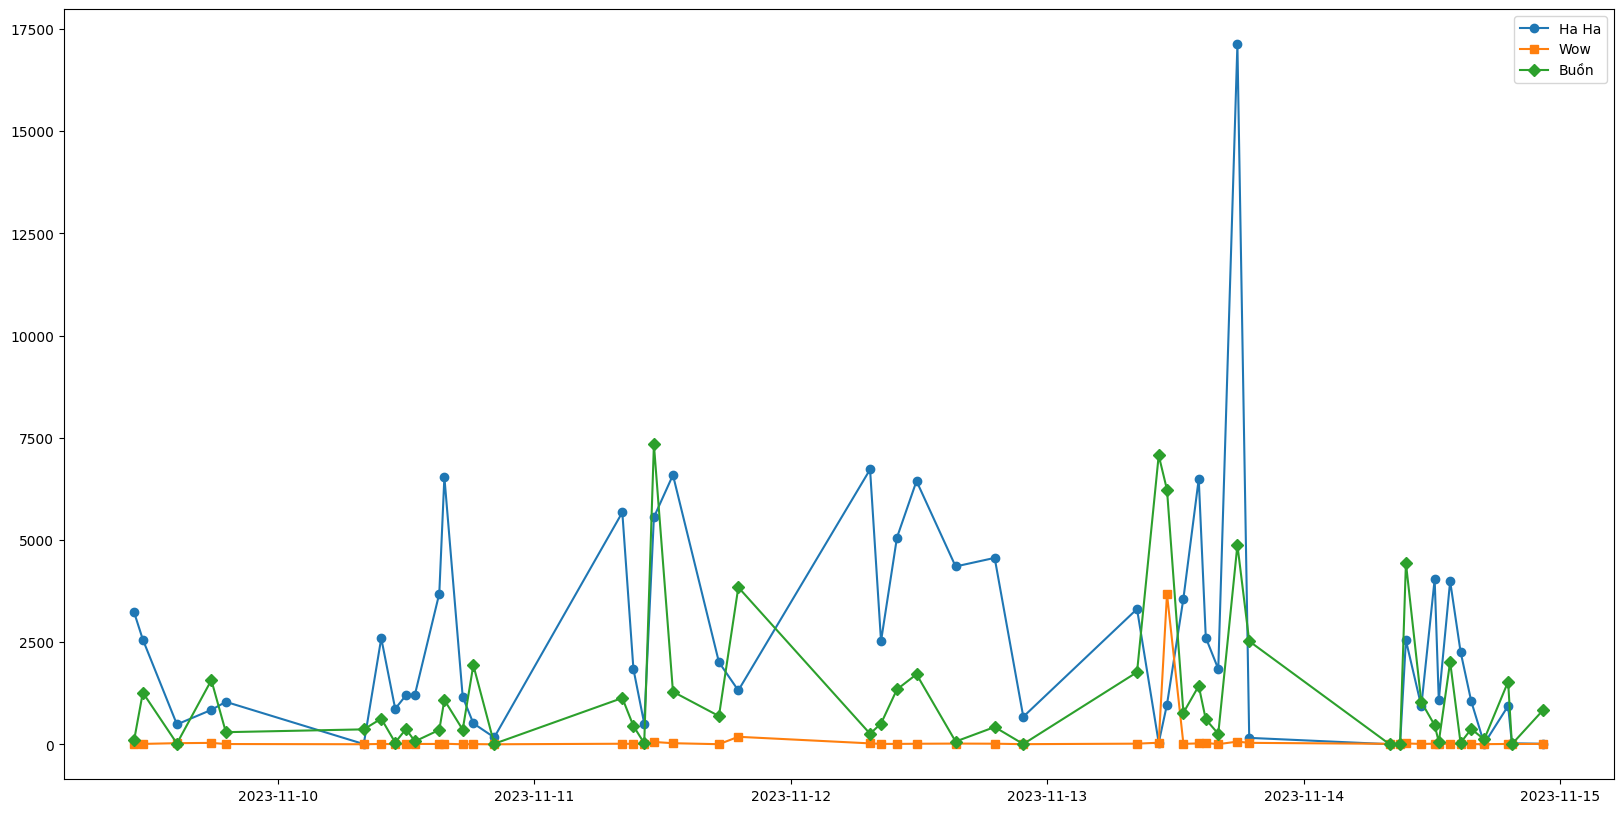

In [160]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(data_from_9_to_14['time'], data_from_9_to_14['haha'], label = "Ha Ha", marker="o")
ax.plot(data_from_9_to_14['time'], data_from_9_to_14['wow'], label = "Wow", marker="s")
ax.plot(data_from_9_to_14['time'], data_from_9_to_14['bu·ªìn'], label = "Bu·ªìn", marker="D")

plt.legend()
plt.show()

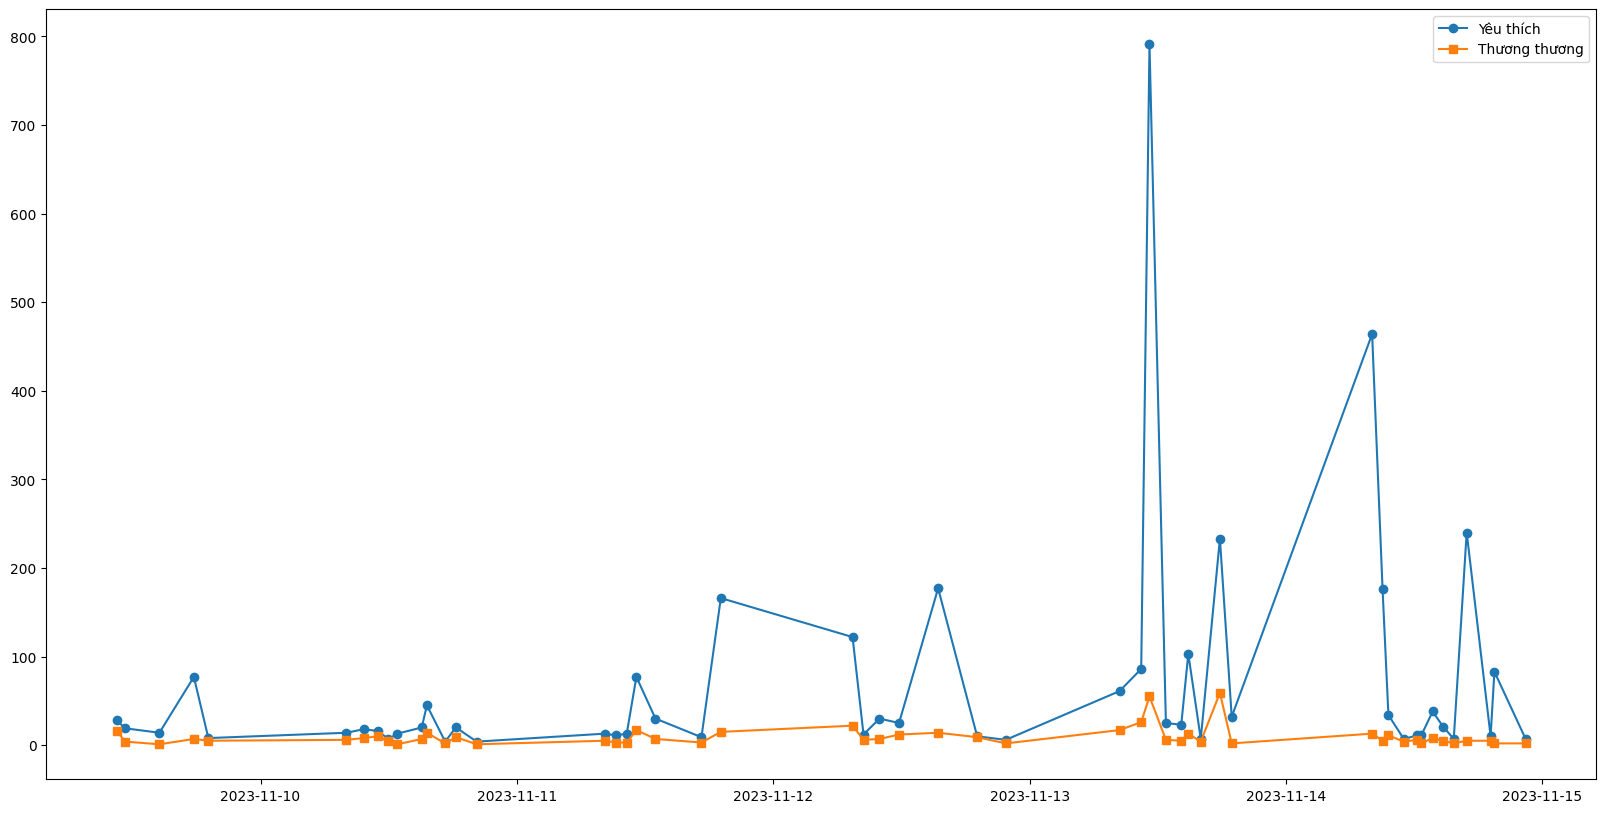

In [161]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(data_from_9_to_14['time'], data_from_9_to_14['y√™u th√≠ch'], label = "Y√™u th√≠ch", marker="o")
ax.plot(data_from_9_to_14['time'], data_from_9_to_14['th∆∞∆°ng th∆∞∆°ng'], label = "Th∆∞∆°ng th∆∞∆°ng", marker="s")

plt.legend()
plt.show()

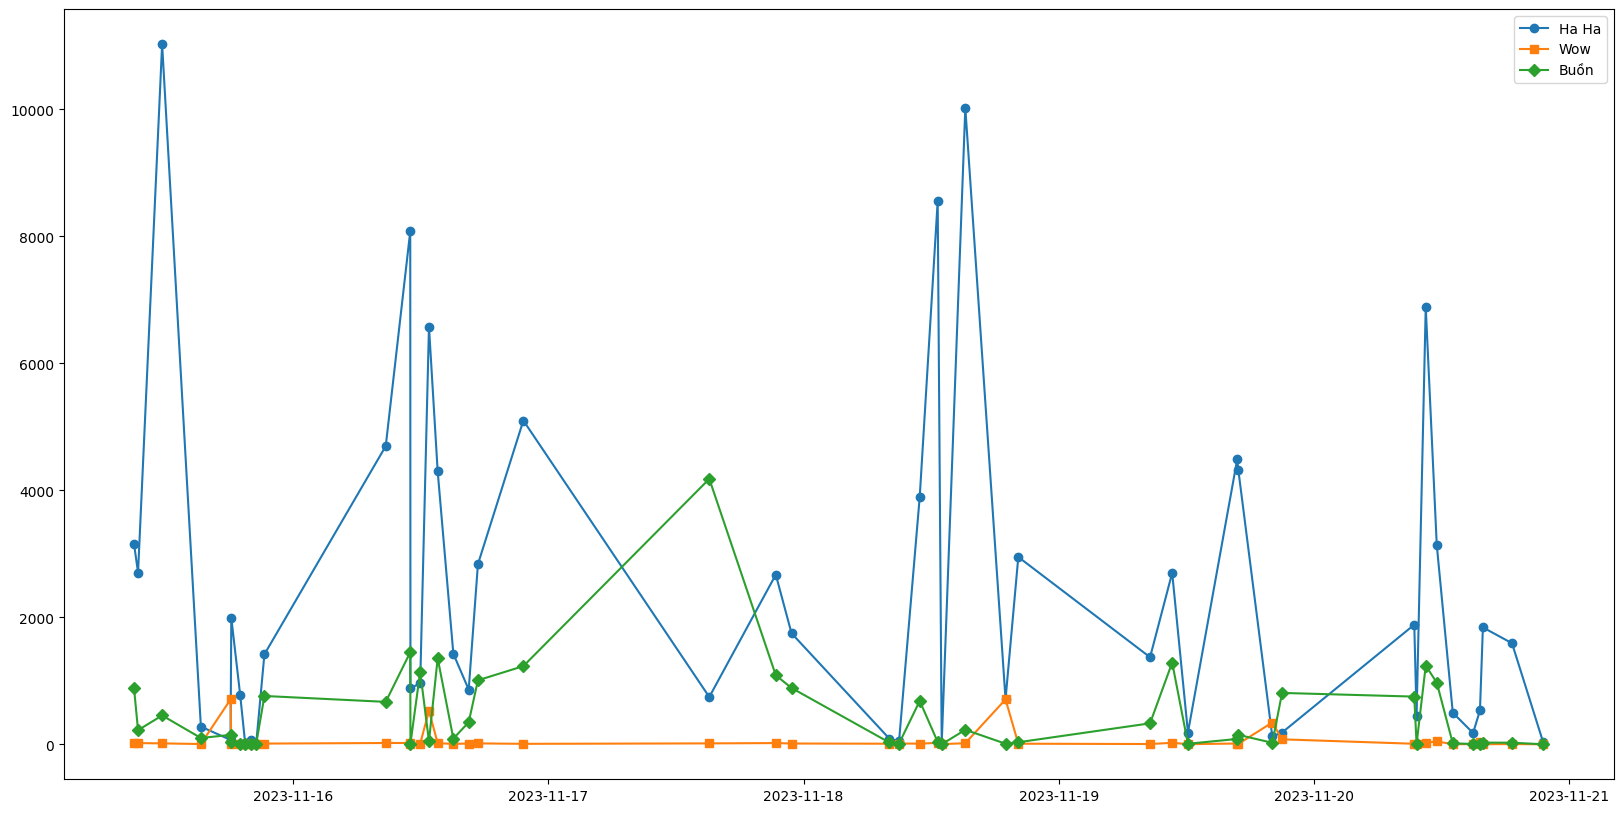

In [162]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(data_from_15_to_20['time'], data_from_15_to_20['haha'], label = "Ha Ha", marker="o")
ax.plot(data_from_15_to_20['time'], data_from_15_to_20['wow'], label = "Wow", marker="s")
ax.plot(data_from_15_to_20['time'], data_from_15_to_20['bu·ªìn'], label = "Bu·ªìn", marker="D")

plt.legend()
plt.show()

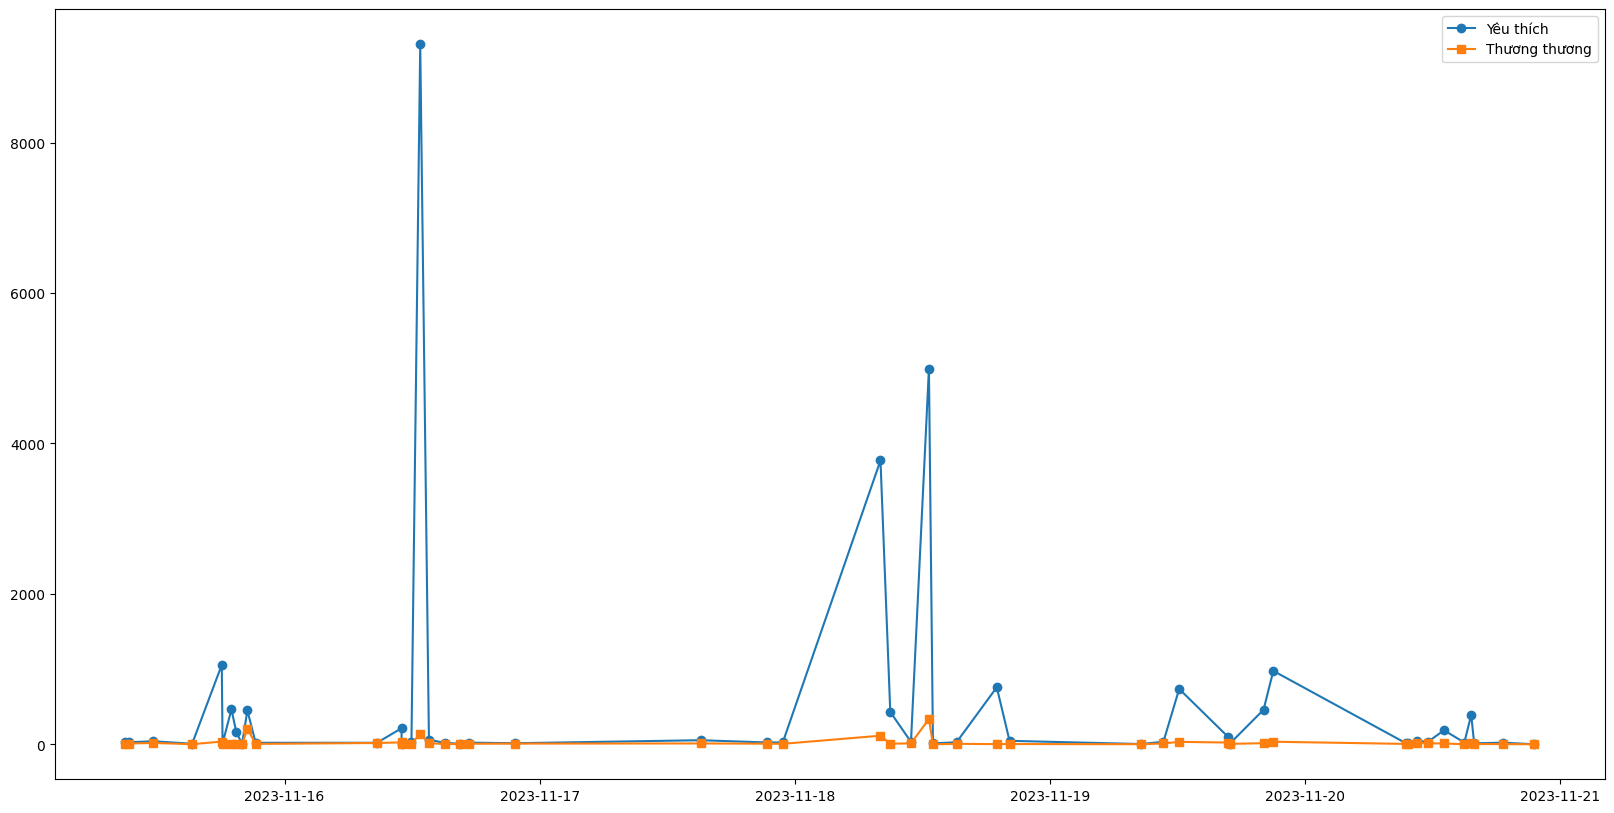

In [163]:

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(data_from_15_to_20['time'], data_from_15_to_20['y√™u th√≠ch'], label = "Y√™u th√≠ch", marker="o")
ax.plot(data_from_15_to_20['time'], data_from_15_to_20['th∆∞∆°ng th∆∞∆°ng'], label = "Th∆∞∆°ng th∆∞∆°ng", marker="s")

plt.legend()
plt.show()

3. `C√°c m·ªëc th·ªùi gian trong ng√†y m√† fanpage hay ƒëƒÉng b√†i vi·∫øt`

In [164]:
pro_df[['text', 'timestamp', 'time']]

text   timestamp  \
0                            t√™n ·ªü nh√† c·ªßa b·∫°n l√† g√¨?  1700490874   
1            m√™ c√°i c√°ch l·ªõp t·∫∑ng qu√† 20/11 cho c√¥ :3  1700480327   
2                              m·∫•y ƒë·ª©a nh√°t g√°i ki·ªÉu:  1700470467   
3   t·ªët nghi·ªáp ƒë·∫°i h·ªçc lu·∫≠t nh∆∞ng th∆° nguy·ªÖn v·∫´n q...  1700469479   
4   ‚Äúb√°c sƒ© m·ªü ph√≤ng kh√°m t∆∞ th√¨ gi√°o vi√™n d·∫°y th√™...  1700467149   
..                                                ...         ...   
95                                     th·ªùi t·ªõiiiiiii  1699531618   
96                          b√†i t·∫≠p c·ªßa chuy√™n anh :3  1699526734   
97  tr∆∞·ªùng h·ªçc c√≥ nh√† v·ªá sinh h·ªçc sinh tr·ªã gi√° 600...  1699515125   
98                                  h·ªçc ki·ªÉu g√¨ v·∫≠y??  1699503639   
99                                   ƒë∆∞·ª£c gi√° th√¨ b√°n  1699500680   

                  time  
0  2023-11-20 21:34:34  
1  2023-11-20 18:38:47  
2  2023-11-20 15:54:27  
3  2023-11-20 15:37:59  
4  2023-11-20 14:59:09  
..                 ...  
95 2023-11-09 19:06:58  
96 2023-11-09 17:45:34  
97 2023-11-09 14:32:05  
98 2023-11-09 11:20:39  
99 2023-11-09 10:31:20  

[100 rows x 3 columns]

In [165]:
posting_frequency_per_day = pro_df.loc[pro_df['day'] == 15]
posting_frequency_per_day

post_id                                               text  \
38  727499809418712                    m√πa ƒë√¥ng c·ªßa c√°c b·∫°n th√¨ sao ??   
39  727323216103038  üíñ kh√¥ng n√≥i l·ªùi y√™u n√†o, nh∆∞ng t·∫•t c·∫£ ƒë·ªÅu l√† t...   
40  727379166097443  game n√†y l√† d·ªÖ r·ªìi üòã\nto√†n thi√™n t√†i h·ªôi h·ªça, ...   
41  727441082757918  ƒë·∫°i h·ªçc y d∆∞·ª£c th√†nh ph·ªë h·ªì ch√≠ minh c√πng v·ªõi ...   
42  727407329427960  b√≠ quy·∫øt ƒë·ªÉ ‚Äúb·∫πo h√¨nh b·∫πo d·∫°ng‚Äù m·ªôt c√°ch nhanh...   
43  727408546094505                          ƒëi h·ªçc nh∆∞ ƒëi ngh·ªâ m√°t :3   
44  727406946094665  ‚ú®nam sinh l·ªõp 9 ·ªü l√†o cai ƒë·∫°t ielts 8.5‚ú®\n\nmi...   
45  727340072768019  ph·∫°m th√†nh long (23 tu·ªïi, qu√™ b·∫Øc ninh) t·ªët ng...   
46  727268742775152                                    h·ªçp l·ªõp belike:   
47  727217576113602                      chuy·ªÉn tr∆∞·ªùng hay chi·∫øn ƒë·∫•u ü§®   
48  727210382780988           n∆°i l·∫°nh h∆°n c·∫£ th·ªùi ti·∫øt h√† n·ªôi l√∫c n√†y   

                                            post_text  shared_text  \
38                    m√πa ƒë√¥ng c·ªßa c√°c b·∫°n th√¨ sao ??          NaN   
39  üíñ kh√¥ng n√≥i l·ªùi y√™u n√†o, nh∆∞ng t·∫•t c·∫£ ƒë·ªÅu l√† t...          NaN   
40  game n√†y l√† d·ªÖ r·ªìi üòã\nto√†n thi√™n t√†i h·ªôi h·ªça, ...          NaN   
41  ƒë·∫°i h·ªçc y d∆∞·ª£c th√†nh ph·ªë h·ªì ch√≠ minh c√πng v·ªõi ...          NaN   
42  b√≠ quy·∫øt ƒë·ªÉ ‚Äúb·∫πo h√¨nh b·∫πo d·∫°ng‚Äù m·ªôt c√°ch nhanh...          NaN   
43                          ƒëi h·ªçc nh∆∞ ƒëi ngh·ªâ m√°t :3          NaN   
44  ‚ú®nam sinh l·ªõp 9 ·ªü l√†o cai ƒë·∫°t ielts 8.5‚ú®\n\nmi...          NaN   
45  ph·∫°m th√†nh long (23 tu·ªïi, qu√™ b·∫Øc ninh) t·ªët ng...          NaN   
46                                    h·ªçp l·ªõp belike:          NaN   
47                      chuy·ªÉn tr∆∞·ªùng hay chi·∫øn ƒë·∫•u ü§®          NaN   
48           n∆°i l·∫°nh h∆°n c·∫£ th·ªùi ti·∫øt h√† n·ªôi l√∫c n√†y          NaN   

    original_text                time   timestamp  \
38            NaN 2023-11-15 21:16:43  1700057803   
39            NaN 2023-11-15 20:30:00  1700055000   
40            NaN 2023-11-15 20:00:02  1700053202   
41            NaN 2023-11-15 19:27:39  1700051259   
42            NaN 2023-11-15 19:00:07  1700049607   
43            NaN 2023-11-15 18:09:53  1700046593   
44            NaN 2023-11-15 18:05:30  1700046330   
45            NaN 2023-11-15 15:18:08  1700036288   
46            NaN 2023-11-15 11:39:24  1700023164   
47            NaN 2023-11-15 09:23:27  1700015007   
48            NaN 2023-11-15 09:00:55  1700013655   

                                                image  \
38  https://scontent.fhan5-10.fna.fbcdn.net/v/t39....   
39  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
40  https://m.facebook.com/photo/view_full_size/?f...   
41  https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...   
42  https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...   
43  https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...   
44  https://m.facebook.com/photo/view_full_size/?f...   
45  https://m.facebook.com/photo/view_full_size/?f...   
46  https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...   
47  https://m.facebook.com/photo/view_full_size/?f...   
48  https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...   

                                     image_lowquality  \
38  https://scontent.fhan5-10.fna.fbcdn.net/v/t39....   
39  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
40  https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...   
41  https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...   
42  https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...   
43  https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...   
44  https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...   
45  https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...   
46  https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...   
47  https://scontent.fhan5-10.fna.fbcdn.net/v/t39....   
48  https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.

C:\Users\AD\AppData\Local\Temp\ipykernel_29868\2760677592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posting_frequency_per_day['hour'] = posting_frequency_per_day['time'].dt.hour


Text(0, 0.5, 'S·ªë b√†i ƒëƒÉng')

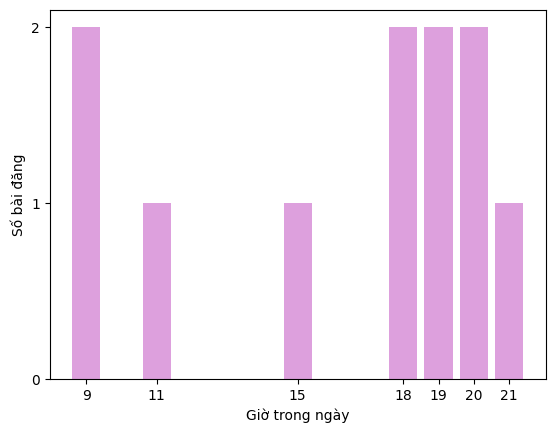

In [166]:
posting_frequency_per_day = pro_df.loc[pro_df['day'] == 15]
posting_frequency_per_day['hour'] = posting_frequency_per_day['time'].dt.hour

hourly_post_counts = posting_frequency_per_day['hour'].sort_values().value_counts()
hours_with_posts = hourly_post_counts.index

plt.bar(hourly_post_counts.index, hourly_post_counts.values, color='plum')

plt.xticks(hours_with_posts)
plt.yticks(range(int(hourly_post_counts.max()) + 1))
# ƒê·∫∑t t√™n cho tr·ª•c x v√† y
plt.xlabel('Gi·ªù trong ng√†y')
plt.ylabel('S·ªë b√†i ƒëƒÉng')




4. `ƒê√¢u l√† c√°c t·ª´ kh√≥a xu·∫•t hi·ªán nhi·ªÅu nh·∫•t trong c√°c b√†i ƒëƒÉng thu ƒë∆∞·ª£c`

In [167]:

text = "" 
for i in pro_df['post_text']:
  text=text+i+"\n"

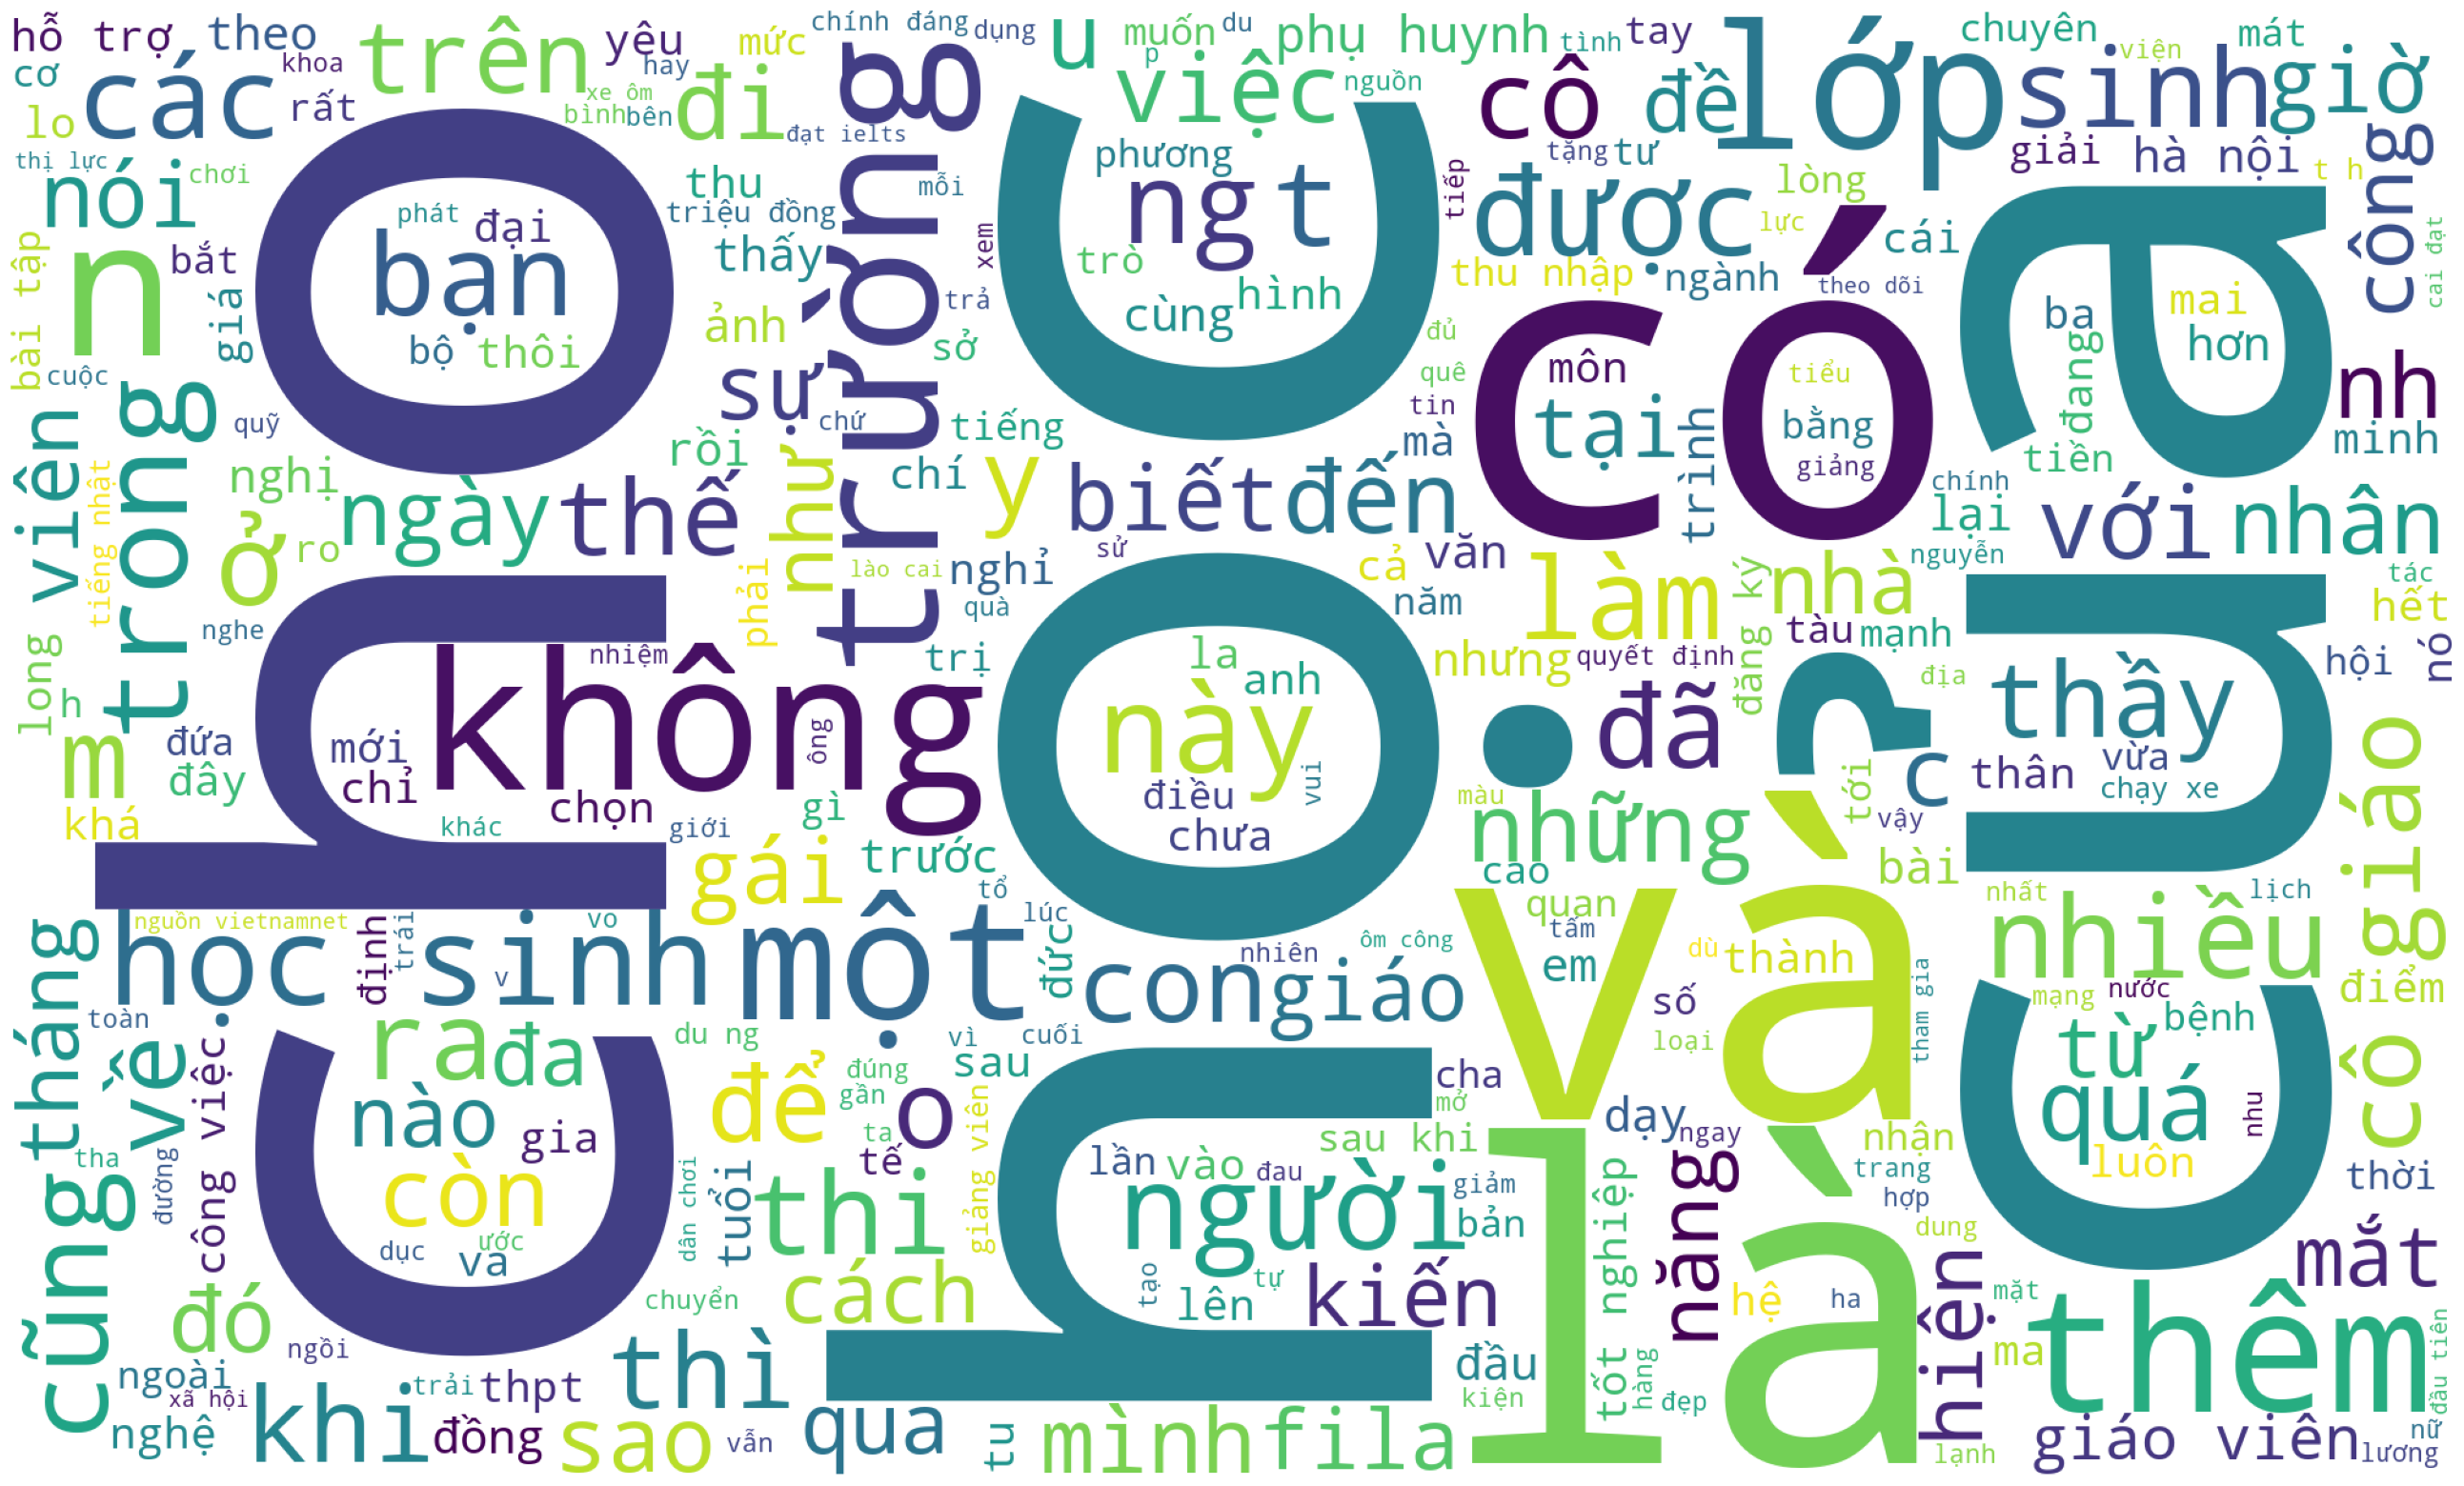

In [168]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

5. `S·ª± t∆∞∆°ng quan gi·ªØa s·ªë l∆∞·ª£ng reactions v·ªõi c√°c tr∆∞·ªùng kh√°c nh∆∞ s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n, ƒë·ªô d√†i b√†i vi·∫øt,..`

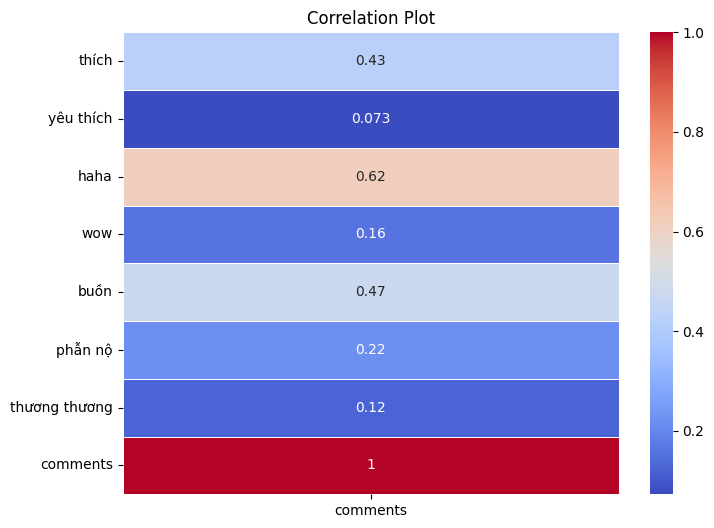

In [169]:


data_reations = pro_df[['th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng', 'comments']]

# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
data_for_corr = data_reations.corr()

# L·∫•y ma tr·∫≠n t∆∞∆°ng quan c·ªßa 'comments' v·ªõi c√°c bi·∫øn kh√°c
correlation_with_comments = data_for_corr['comments'].to_frame()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_comments, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Plot")
plt.show()

In [170]:
pro_df['post_length'] = pro_df['post_text'].apply(lambda x : len(str(x)))
pro_df['post_length']

0      24
1      40
2      22
3      68
4     856
     ... 
95     14
96     25
97    301
98     17
99     16
Name: post_length, Length: 100, dtype: int64

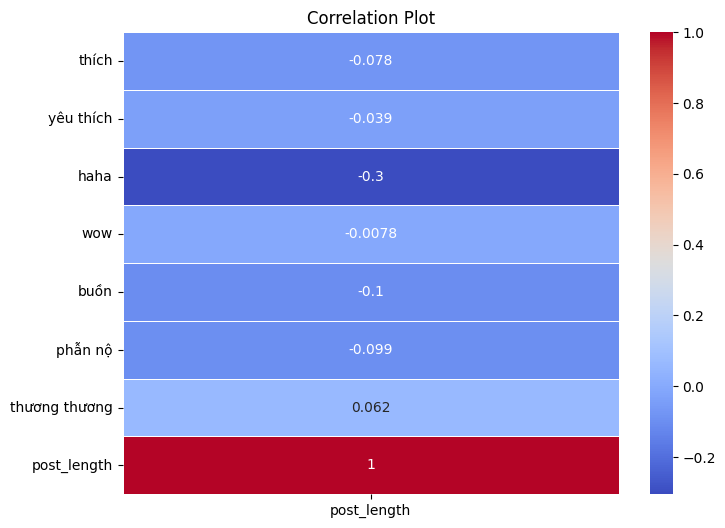

In [171]:

data_reations1 = pro_df[['th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng', 'post_length']]

# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
data_for_corr1 = data_reations1.corr()

# L·∫•y ma tr·∫≠n t∆∞∆°ng quan c·ªßa 'comments' v·ªõi c√°c bi·∫øn kh√°c
correlation_with_post_length1 = data_for_corr1['post_length'].to_frame()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_post_length1, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Plot")
plt.show()

In [172]:
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        100 non-null    int64         
 1   text                           100 non-null    object        
 2   post_text                      100 non-null    object        
 3   shared_text                    0 non-null      float64       
 4   original_text                  0 non-null      float64       
 5   time                           100 non-null    datetime64[ns]
 6   timestamp                      100 non-null    int64         
 7   image                          93 non-null     object        
 8   image_lowquality               100 non-null    object        
 9   images                         100 non-null    object        
 10  images_description             100 non-null    object        
 11  images_lowquality   

In [173]:
pro_df['image'].isna().value_counts()

image
False    93
True      7
Name: count, dtype: int64

In [174]:
pro_df['image']

0                                                   NaN
1     https://scontent.fhan15-1.fna.fbcdn.net/v/t39....
2                                                   NaN
3     https://m.facebook.com/photo/view_full_size/?f...
4                                                   NaN
                            ...                        
95    https://scontent.fsgn5-5.fna.fbcdn.net/v/t39.3...
96    https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...
97    https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...
98    https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...
99    https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...
Name: image, Length: 100, dtype: object

In [175]:
pro_df[(pro_df['video'].isna()) & (pro_df['image'].isna())][['text','time', 'image', 'video']]

text                time  \
4  ‚Äúb√°c sƒ© m·ªü ph√≤ng kh√°m t∆∞ th√¨ gi√°o vi√™n d·∫°y th√™... 2023-11-20 14:59:09   
9                               c√£i l√†m sao ƒë∆∞·ª£c=))) 2023-11-20 09:27:11   

  image video  
4   NaN   NaN  
9   NaN   NaN